# **Laboratorio #3 - Modulación de Ángulo**


In [46]:
#Bibliotecas y funciones
#Se importan las bibliotecas mas importantes
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin,cos,pi, linspace
from scipy.fft import fft, fftfreq
from scipy.signal import butter, lfilter, freqz
from math import factorial
import scipy.special as sp


#Definicion de funciones a utilizar
#Funcion para crear una señal cosenoidal
def cosenoidal(f,A,Offset=0, Theta=0):
    m = A*cos(2*pi*f*t + Theta) + Offset
    return m

#Funcion para realizar un FFT de una señal
def plotfft(func):
    F = fft(func)
    tf = fftfreq(samples, T/samples)
    return tf,F

#Funciones para filtro basa bajas
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def derivador(A,f,t,func_type= "cos",phase=0):
    if func_type == "cos":
        f = -A*2*pi*f*sin(2*pi*f*t+phase)
    elif func_type == "sin":
        f = A*2*pi*f*cos(2*pi*f*t+phase)
    return f

def integrador(A,f,t,func_type= "cos",phase=0):
    if func_type == "cos":
        f = A*sin(2*pi*f*t+phase)/(f)
    elif func_type == "sin":
        f = -A*cos(2*pi*f*t+phase)/(f)
    return f

def PM(ac,fc,kp,m):
    output = ac*cos(2*pi*fc*t + kp*m)
    return output

def FM(ac,fc,kf,am,fm):
    output = ac*cos(2*pi*fc*t + 2*pi*kf*integrador(am,fm,t,'cos',0))
    return output


## ACTIVIDAD # 1 


#### 1.  A partir de las ecuaciones de señal modulada FM y PM, obtenga las curvas que describen el comportamiento de un sistema básico de modulación de ángulo. Para la señal moduladora puede usar una señal de tono continua clásica, esto es, un seno o un coseno como por ejemplo 𝑚(𝑡) = 𝐴m cos(2𝜋𝑓m t). Debe desplegar las siguientes curvas: m(t), m’(t), c(t) y s(t) tanto para FM como para PM, para un total de 5 gráficas. Los valores de las diferentes variables debe ajustarlos para que las gráficas anteriores permitan apreciar correctamente el comportamiento de ambos tipos de modulación. Recuerde que debe explicar adecuadamente en la notebook todas las elecciones y criterios que lleve cabo. Realice un análisis completo de los resultados obtenidos, para cada gráfica.

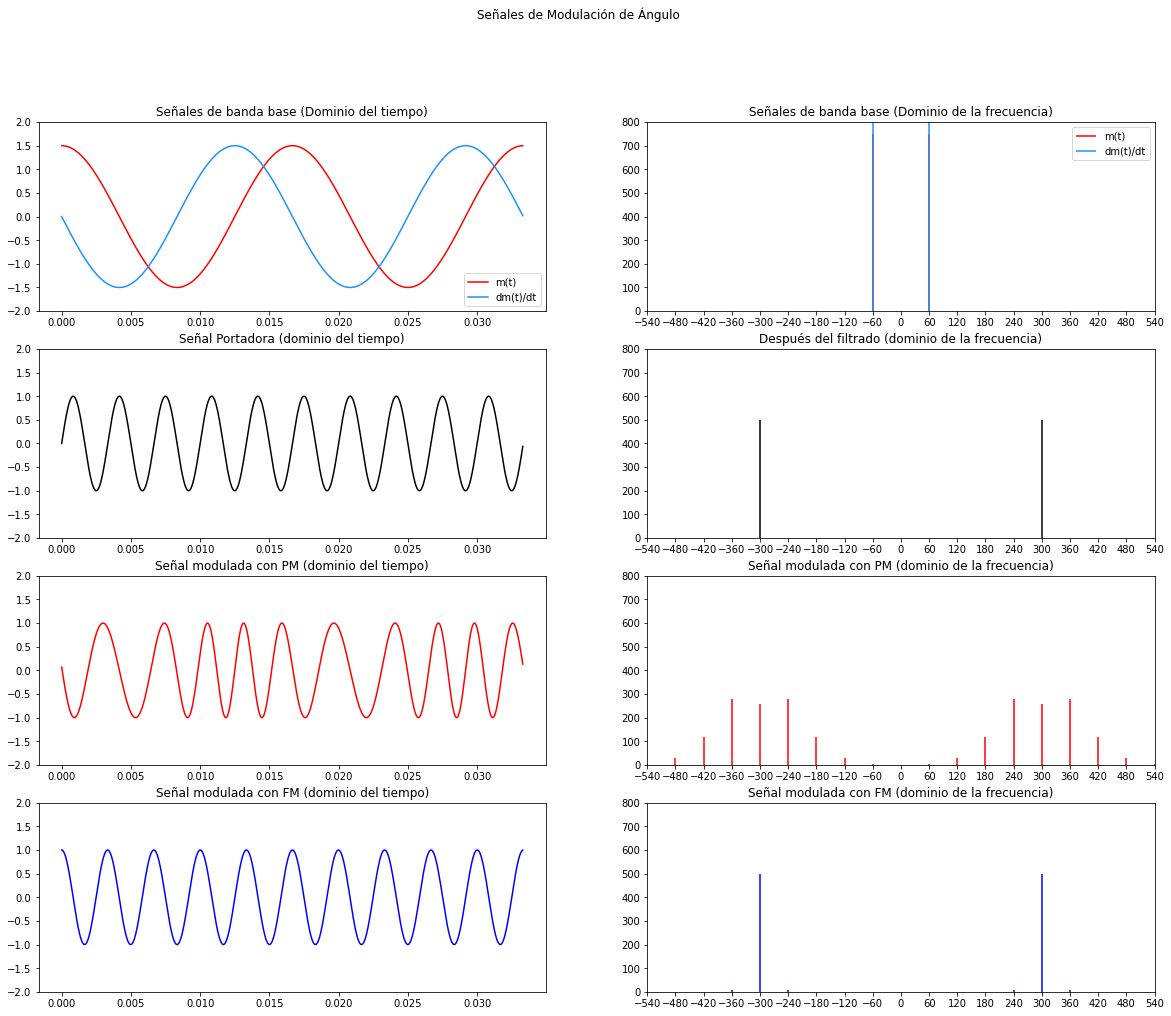

In [47]:
#Señales de entrada

#Numero de puntos y duracion
samples = 1000 
T = 2/60

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)

#Señales iniciales:
#Moduladora
#Frecuencia de 60Hz, Amplitud de 1.5 y Offset de 2
fm = 60
Am = 1.5
Offm = 0
m = cosenoidal(fm,Am,Offm)
Mtf, M = plotfft(m)

#Protadora
#Frecuencia de 300Hz y Amplitud de 1
fc = 300
Ac = 1
c = cosenoidal(fc,Ac,0,-pi/2)
Ctf, C = plotfft(c)

#Derivada de la moduladora
mp=derivador(Am,fm,t,'cos',0)
MPtf, MP = plotfft(mp)

#SPM
kp= 1.66
spm=PM(Ac,fc,kp,m)
SPMtf, SPM = plotfft(spm)

#SFM
kf= 100
sfm=FM(Ac,fc,kf,Am,fm)
SFMtf, SFM = plotfft(sfm)

#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales de Modulación de Ángulo')

#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].plot(t,mp/(fm*2*pi),color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].vlines(MPtf,0,np.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Portadora (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[1,1].set_title('Señal Portadora (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,np.abs(C),color='black')

#SPM
axs[2,0].plot(t,spm, color='dodgerblue')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal modulada con PM (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[2,1].vlines(SPMtf,0,np.abs(SPM),color='dodgerblue')
axs[2,1].set_title('Señal modulada con PM (dominio de la frecuencia)')

#SFM
axs[3,0].plot(t,sfm, color='r')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal modulada con FM (dominio del tiempo)')

axs[3,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[3,1].vlines(SFMtf,0,np.abs(SFM),color='red')
axs[3,1].set_title('Señal modulada con FM (dominio de la frecuencia)')
plt.show()

Si analizamos la señal modulada PM, se observa que en el domino del tiempo, tal y como se espera, la frecuencia de la señal modulada varia de forma proporcional a la amplitud de la derivada de la señal moduladora; y en el domino de la frecuencia aparecen diferentes componentes a nuevas frecuencias.
Por otro lado, al analizar la señal modulada FM en el domino del tiempo, esta cambia su frecuencia de forma proporcional a la amplitud de la señal portadora, alcanzando la frecuencia máxima cuando la amplitud de la señal moduladora llega a su maximo valor. Ademas se aprecia que al igual que la señal modulada PM, en el domino de la frecuencia, la señal modulada tiene componentes adicionales en nuevas frecuencias, pero esta vez incluye una nueva componente en 0 Hz.


## ACTIVIDAD # 2


#### 1. Construya un sistema de comunicación modulador FM de tipo NBFM y NBPM. Elija y justifique los valores apropiados de las distintas variables que permitan observar el comportamiento esperado de ambos métodos. 

Se sabe para que sea una modulación de banada angosta el indice de modulación debe ser menor a 0.3 o 0.2 dependiendo de la literatura. Para el caso de la modulación por frecuencia la forma de calcular dicho índice es B = (Kf Am)/fm), dependiendo sola mente de la onda moduladora y un factor. Por otro lado el calculo para la modulación de fase es mediante B = Kp Am.
Para el calculo de los valores se empieza con una señal moduladora cosenoidal de 20Hz y 1.5 de amplitud, una portadora de 300Hz con amplitud de 1 y despejando de las ecuaciones anteriores para obtener un B de 0.3 se usó un Kf de 3 y un kp de 0.15 

#### 2. Verifique las señales moduladas obtenidas tanto en el tiempo como en la frecuencia, explique los resultados obtenidos. 


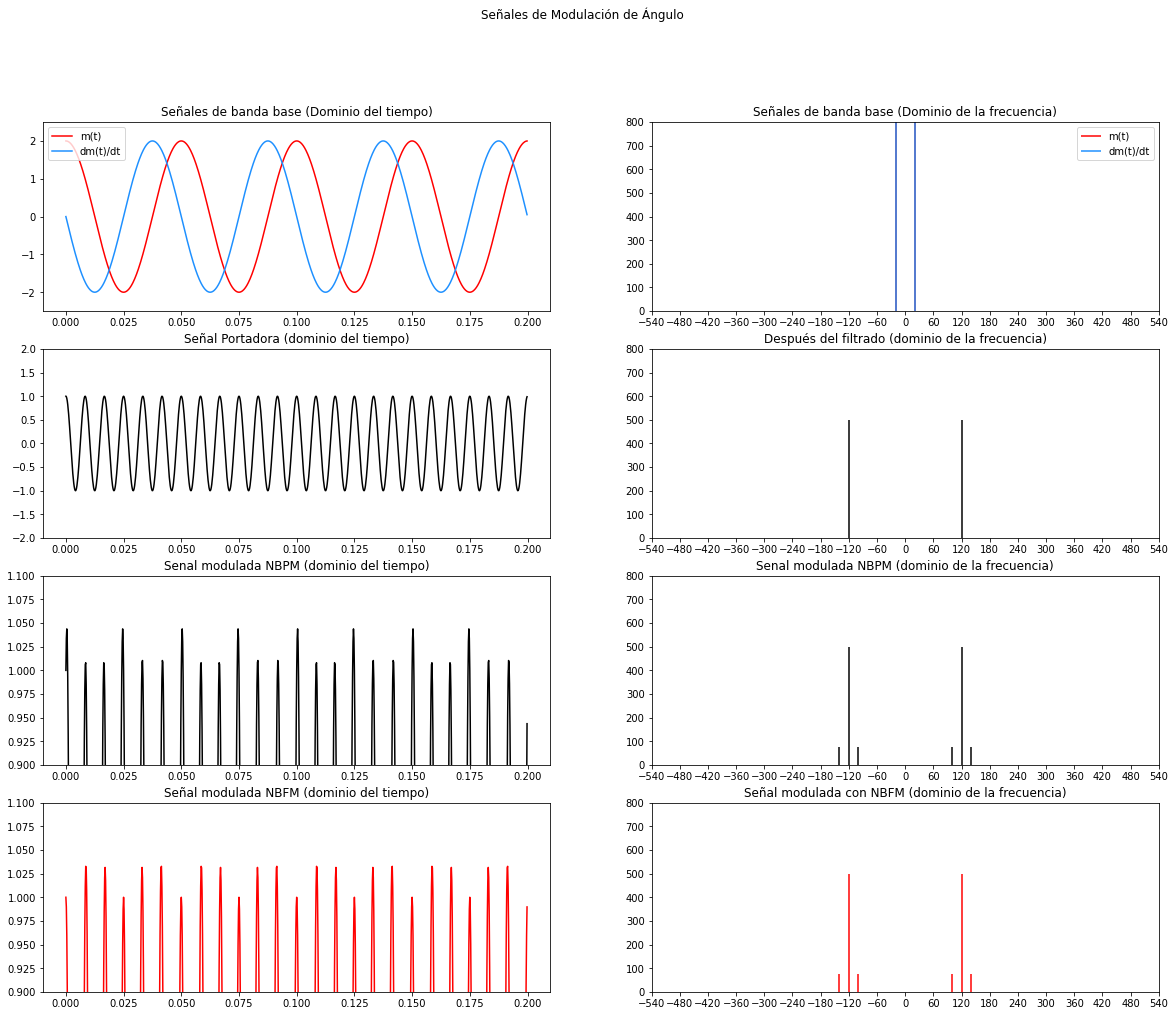

Indice de modulacion NBFM:  0.3
Indice de modulacion NBPM:  0.3


In [48]:
#Numero de puntos y duracion

samples = 1000 
T = 2/10

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)


#Creacion de la senal de entrada
fm = 20
Am = 2
off = 0
m = cosenoidal(fm,Am,off)
Mtf, M = plotfft(m)

#Senal portadora 
fc = 120
Ac = 1
c = cosenoidal(fc,Ac,0,0)
Ctf, C = plotfft(c)

#Senal portadora con desface de 90
cd = cosenoidal(fc,Ac,0,-pi/2)
Cdtf, Cd = plotfft(cd)

#Derivada de la senal moduladora
mp=derivador(Am,fm,t,'cos',0)
MPtf, MP = plotfft(mp)

#Integral de la senal moduladora 
mi=integrador(Am,fm,t,'cos',0)

#Indice de modulacion B
kf = 3
B = (kf*Am)/fm

#NBFM (Senal modulada)
snbfm = c + cd*mi*kf
#snbfm = Ac*cos(2*pi*fc*t) - B*Ac*sin(2*pi*t*fc)*sin(2*pi*t*fm)
Snbfmtf, Snbfm = plotfft(snbfm)

#Salida NBPM
kp = 0.15
snbpm = c + cd*m*kp
Snbpmtf, Snbpm = plotfft(snbpm)


#Plot de las señales desmodulada antes y despues del filtrado
fig4, axs = plt.subplots(4,2,figsize=(20,16))
fig4.suptitle('Señales de Modulación de Ángulo')


#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2.5,2.5))
axs[0,0].plot(t,mp/(fm*2*pi),color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].vlines(MPtf,0,np.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Portadora (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[1,1].set_title('Después del filtrado (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,np.abs(C),color='black')

#NBPM
axs[2,0].plot(t,snbpm,color='black')
axs[2,0].set(ylim=(0.9,1.1))
axs[2,0].set_title('Senal modulada NBPM (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[2,1].set_title('Senal modulada NBPM (dominio de la frecuencia)')
axs[2,1].vlines(Snbpmtf,0,np.abs(Snbpm),color='black')

#NBFM
axs[3,0].plot(t,snbfm, color='r')
axs[3,0].set(ylim=(0.9,1.1))
axs[3,0].set_title('Señal modulada NBFM (dominio del tiempo)')

axs[3,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[3,1].vlines(Snbfmtf,0,np.abs(Snbfm),color='red')
axs[3,1].set_title('Señal modulada con NBFM (dominio de la frecuencia)')
plt.show()


print('Indice de modulacion NBFM: ', (kf*Am)/fm)
print('Indice de modulacion NBPM: ', kp*Am)

Casi no podemos extaer información del dominio del tiempo ya que al ser banda angosta las señales son muy similares a las portadoras, solo presentando pequeñas variaciones en la amplitud, debido a esto se hace zoom a la grafica para poder apreciar mejor la envolvente, por otro lado, en el dominio de la frecuencia se puede observar más facilmente como queda una copia atenuada de la señal moduladora. 

#### 3. Para el caso del modulador NBFM, seleccione al menos dos valores de beta, uno donde se aprecie que existe modulación de amplitud residual, y otro valor de beta donde se mantengan los criterios de NBFM/PM, pero que NO se presente modulación en amplitud residual, justifique ambos valores de beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


A continuación se presentan dos casos de NBFM ambos con una misma señal moduladora cosenoidal de 20Hz y amplitud 2. 

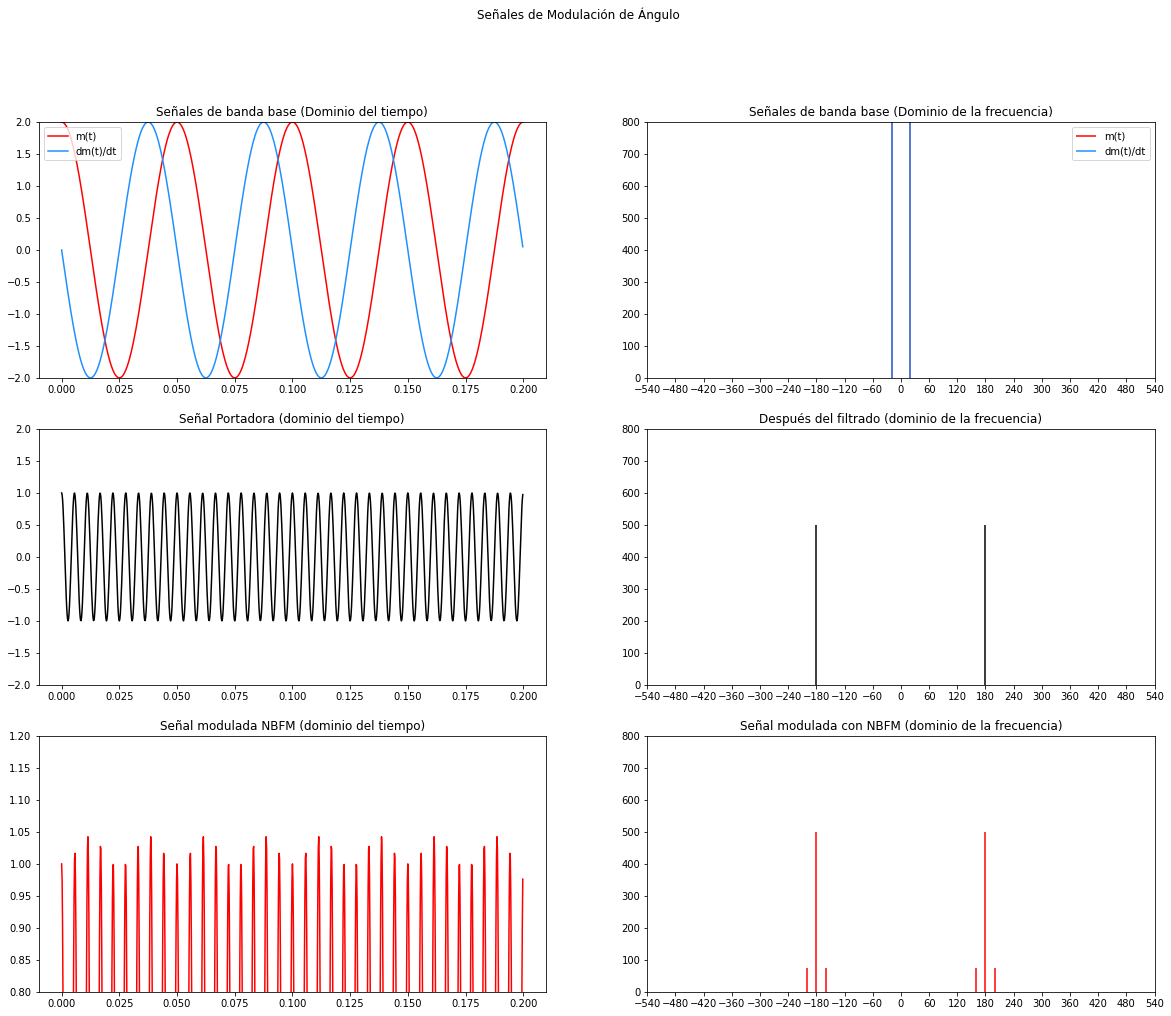

Indice de modulacion NBFM:  0.3


In [49]:
#Numero de puntos y duracion

samples = 1000 
T = 2/10

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)


#Creacion de la senal de entrada
fm = 20
Am = 2
off = 0
m = cosenoidal(fm,Am,off)
Mtf, M = plotfft(m)

#Senal portadora 
fc = 180
Ac = 1
c = cosenoidal(fc,Ac,0,0)
Ctf, C = plotfft(c)

#Senal portadora con desface de 90
cd = cosenoidal(fc,Ac,0,-pi/2)
Cdtf, Cd = plotfft(cd)

#Derivada de la senal moduladora
mp=derivador(Am,fm,t,'cos',0)
MPtf, MP = plotfft(mp)

#Integral de la senal moduladora 
mi=integrador(Am,fm,t,'cos',0)

#Indice de modulacion B
kf = 3
B = (kf*Am)/fm

#NBFM (Senal modulada)
snbfm = c + cd*mi*kf
#snbfm = Ac*cos(2*pi*fc*t) - B*Ac*sin(2*pi*t*fc)*sin(2*pi*t*fm)
Snbfmtf, Snbfm = plotfft(snbfm)

#Salida NBPM
snbpm = c + cd*m*kp
Snbpmtf, Snbpm = plotfft(snbpm)


#Plot de las señales desmodulada antes y despues del filtrado
fig4, axs = plt.subplots(3,2,figsize=(20,16))
fig4.suptitle('Señales de Modulación de Ángulo')


#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].plot(t,mp/(fm*2*pi),color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].vlines(MPtf,0,np.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Portadora (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[1,1].set_title('Después del filtrado (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,np.abs(C),color='black')


#NBFM
axs[2,0].plot(t,snbfm, color='r')
axs[2,0].set(ylim=(0.8,1.2))
axs[2,0].set_title('Señal modulada NBFM (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[2,1].vlines(Snbfmtf,0,np.abs(Snbfm),color='red')
axs[2,1].set_title('Señal modulada con NBFM (dominio de la frecuencia)')
plt.show()


print('Indice de modulacion NBFM: ', (kf*Am)/fm)

En este ejemplo podemos ver una modulación con un indice aceptable de 0.3 en donde se puede observar completamente como hay un efecto en la amplitud vastante notable, de aproximadamente un 5%. A su vez podemos observar en la frecuencia como se agregó la componente de la moduladora.

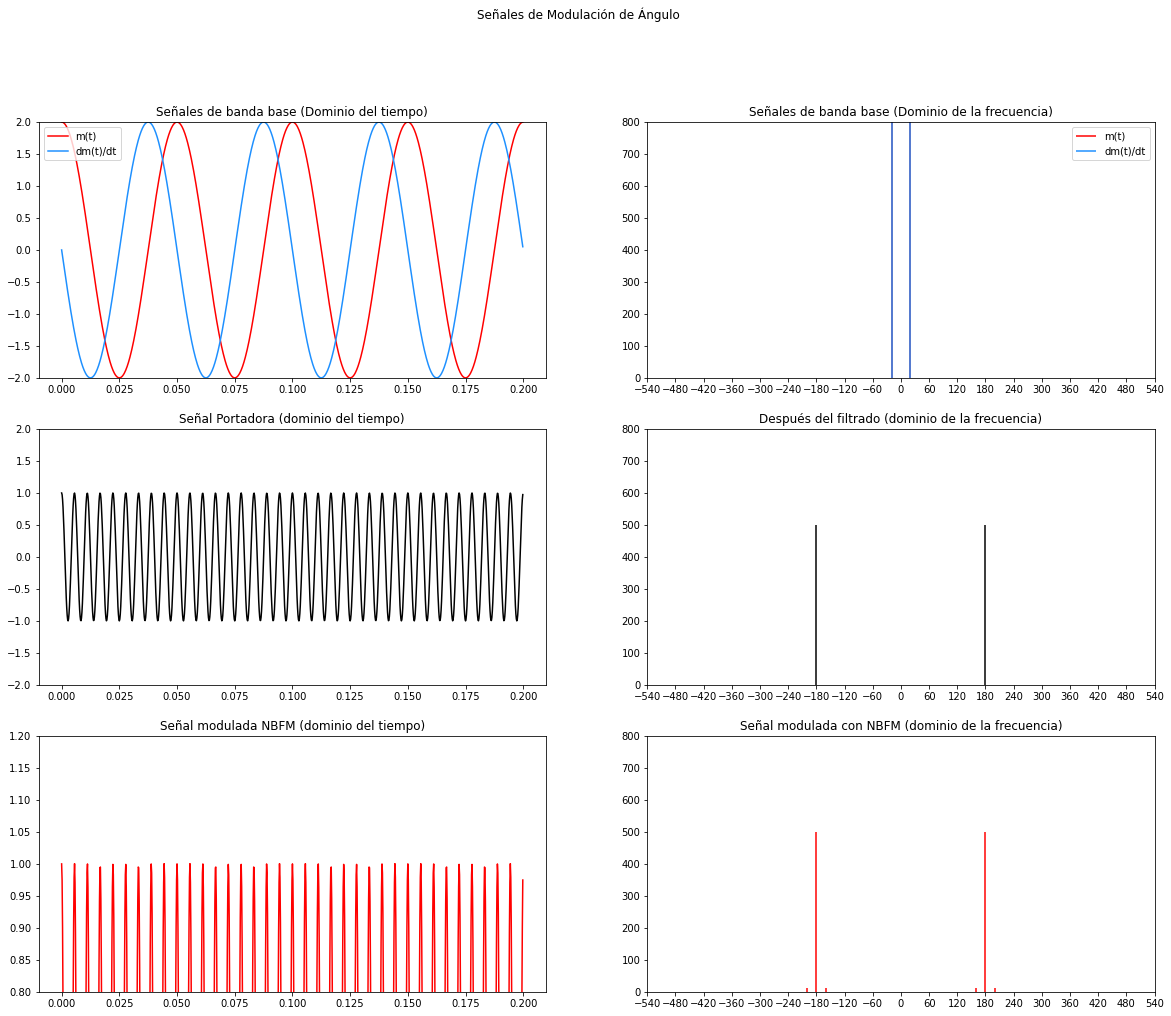

Indice de modulacion NBFM:  0.05


In [50]:
#Numero de puntos y duracion

samples = 1000 
T = 2/10

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)


#Creacion de la senal de entrada
fm = 20
Am = 2
off = 0
m = cosenoidal(fm,Am,off)
Mtf, M = plotfft(m)

#Senal portadora 
fc = 180
Ac = 1
c = cosenoidal(fc,Ac,0,0)
Ctf, C = plotfft(c)

#Senal portadora con desface de 90
cd = cosenoidal(fc,Ac,0,-pi/2)
Cdtf, Cd = plotfft(cd)

#Derivada de la senal moduladora
mp=derivador(Am,fm,t,'cos',0)
MPtf, MP = plotfft(mp)

#Integral de la senal moduladora 
mi=integrador(Am,fm,t,'cos',0)

#Indice de modulacion B
kf = 0.5
B = (kf*Am)/fm

#NBFM (Senal modulada)
snbfm = c + cd*mi*kf
#snbfm = Ac*cos(2*pi*fc*t) - B*Ac*sin(2*pi*t*fc)*sin(2*pi*t*fm)
Snbfmtf, Snbfm = plotfft(snbfm)

#Salida NBPM
snbpm = c + cd*m*kp
Snbpmtf, Snbpm = plotfft(snbpm)


#Plot de las señales desmodulada antes y despues del filtrado
fig4, axs = plt.subplots(3,2,figsize=(20,16))
fig4.suptitle('Señales de Modulación de Ángulo')


#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].plot(t,mp/(fm*2*pi),color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].vlines(MPtf,0,np.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Portadora (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[1,1].set_title('Después del filtrado (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,np.abs(C),color='black')


#NBFM
axs[2,0].plot(t,snbfm, color='r')
axs[2,0].set(ylim=(0.8,1.2))
axs[2,0].set_title('Señal modulada NBFM (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[2,1].vlines(Snbfmtf,0,np.abs(Snbfm),color='red')
axs[2,1].set_title('Señal modulada con NBFM (dominio de la frecuencia)')
plt.show()


print('Indice de modulacion NBFM: ', (kf*Am)/fm)

En este ejemplo podemos ver una modulación con un indice muy bajo de 0.05 en donde no puede observarse ningún cambio en la amplitud pero si se observa como en la frecuancia si queda una copia atenuada de la señal moduladora en la informacion de la portadora. Si se presta atencion a la ecuación de este modulador, es un coseno de la señal portadora restado a un producto de senos multiplicado por un factor B, esto siginifica que mientras más pequeño sea dicho factor menos va a ser el efecto en la amplitud hasta no poder notarse. En este ejemplo podemos ver que ya con un valor de 0.05 no podemos apreciar un cambio de amplitud apreciable.
El comportamiento es el esperado mirando la ecuación ya que es equivalente a la señal portadora menos un producto de senos el cual a su vez es multiplicado por buestro indice de modulacion, dicho de otra forma, el indice indica nuestro efecto sobre la amplitud.

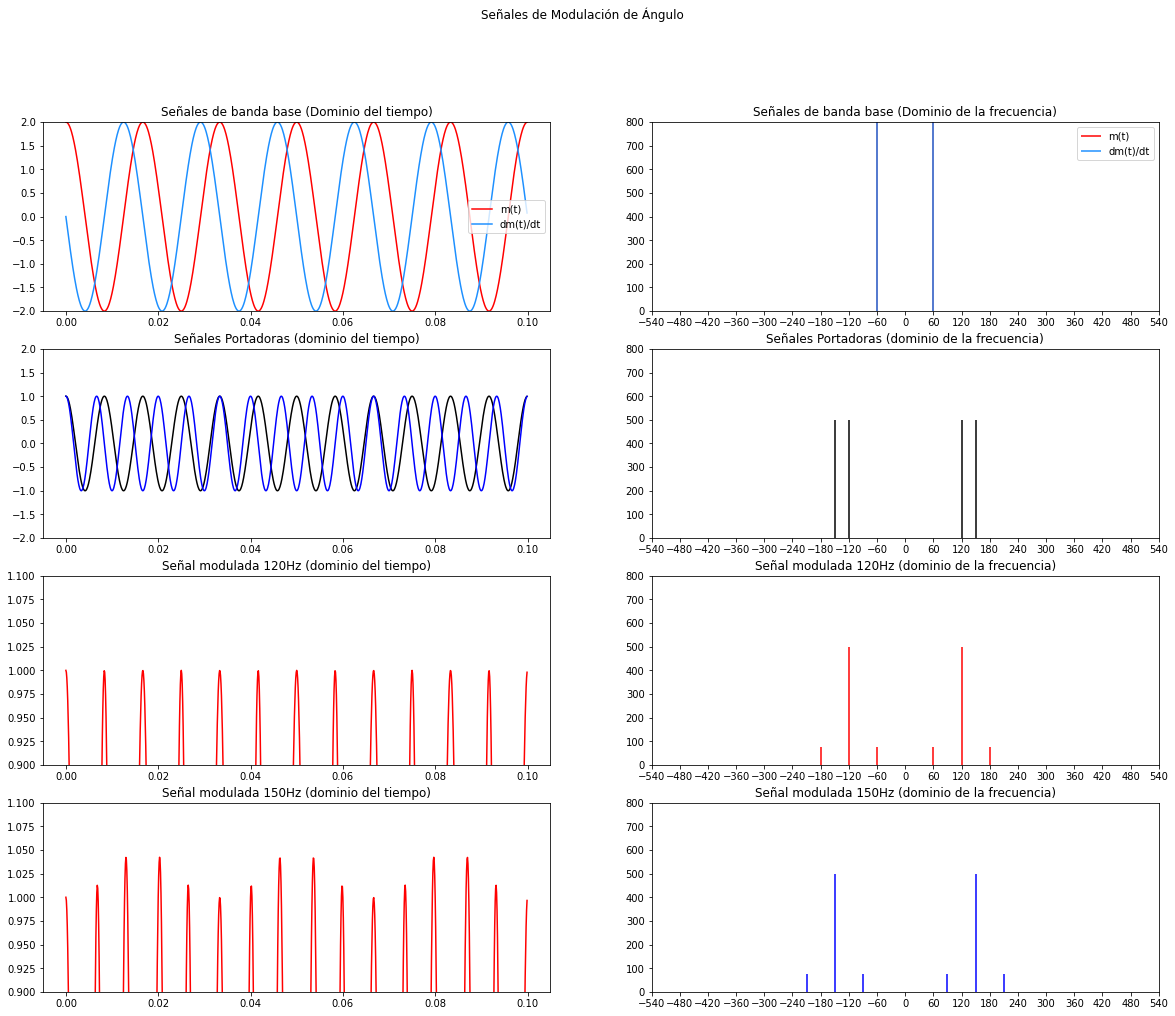

Indice de modulacion NBFM:  0.3


In [53]:
#Numero de puntos y duracion

samples = 1000 
T = 2/20

#Espacio temporal
t = linspace(0, T, samples, endpoint=False)


#Creacion de la senal de entrada
fm = 60
Am = 2
off = 0
m = cosenoidal(fm,Am,off)
Mtf, M = plotfft(m)

#Senal portadora 
fc = 120
Ac = 1
c = cosenoidal(fc,Ac,0,0)
Ctf, C = plotfft(c)

#Senal portadora 
fc2 = 150
Ac = 1
c2 = cosenoidal(fc2,Ac,0,0)
C2tf, C2 = plotfft(c2)

#Senal portadora con desface de 90
cd = cosenoidal(fc,Ac,0,-pi/2)
Cdtf, Cd = plotfft(cd)

#Señal portadora a 150
cd2 = cosenoidal(fc2,Ac,0,-pi/2)
Cd2tf, Cd2 = plotfft(cd2)

#Derivada de la senal moduladora
mp=derivador(Am,fm,t,'cos',0)
MPtf, MP = plotfft(mp)

#Integral de la senal moduladora 
mi=integrador(Am,fm,t,'cos',0)

#Indice de modulacion B
kf = 9
B = (kf*Am)/fm

#NBFM (Senal modulada)
snbfm = c + cd*mi*kf
Snbfmtf, Snbfm = plotfft(snbfm)

#NBFM (Senal modulada)
snbfm2 = c2 + cd2*mi*kf
Snbfmtf2, Snbfm2 = plotfft(snbfm2)



#Salida NBPM
kp = 0.15
snbpm = c + cd*m*kp
Snbpmtf, Snbpm = plotfft(snbpm)


#Plot de las señales desmodulada antes y despues del filtrado
fig4, axs = plt.subplots(4,2,figsize=(20,16))
fig4.suptitle('Señales de Modulación de Ángulo')


#Moduladora y su derivada
axs[0,0].plot(t,m,color='red')
axs[0,0].set_title('Señales de banda base (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].plot(t,mp/(fm*2*pi),color='dodgerblue')
axs[0,0].legend(["m(t)", "dm(t)/dt"])

axs[0,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[0,1].vlines(Mtf,0,np.abs(M),color='red')
axs[0,1].vlines(MPtf,0,np.abs(MP),color='dodgerblue')
axs[0,1].set_title('Señales de banda base (Dominio de la frecuencia)')
axs[0,1].legend(["m(t)", "dm(t)/dt"])

#Portadora
axs[1,0].plot(t,c,color='black')
axs[1,0].plot(t,c2,color='blue')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señales Portadoras (dominio del tiempo)')

axs[1,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[1,1].set_title('Señales Portadoras (dominio de la frecuencia)')
axs[1,1].vlines(Ctf,0,np.abs(C),color='black')
axs[1,1].vlines(C2tf,0,np.abs(C2),color='black')


#NBFM
axs[2,0].plot(t,snbfm, color='r')
axs[2,0].set(ylim=(0.9,1.1))
axs[2,0].set_title('Señal modulada 120Hz (dominio del tiempo)')

axs[2,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[2,1].vlines(Snbfmtf,0,np.abs(Snbfm),color='red')
axs[2,1].set_title('Señal modulada 120Hz (dominio de la frecuencia)')

#NBFM2
axs[3,0].plot(t,snbfm2, color='r')
axs[3,0].set(ylim=(0.9,1.1))
axs[3,0].set_title('Señal modulada 150Hz (dominio del tiempo)')

axs[3,1].set(xlim=(-100,100),ylim=(0,800),xticks=(range(-540,580,60)))
axs[3,1].vlines(Snbfmtf2,0,np.abs(Snbfm2),color='blue')
axs[3,1].set_title('Señal modulada 150Hz (dominio de la frecuencia)')
plt.show()


print('Indice de modulacion NBFM: ', (kf*Am)/fm)

Como analisis extra el efecto sobre la amplitud residual también puede cambiar dependiendo de la frecuencia de la portadora, esto debido a el efecto de la misma sobre la multiplicacion de los senos en la exprecion de la NBFM, para este caso se observa la diferencia en la señal modulada cuando la portadora es de 120 y 150Hz, variando bastante a pesar de tener un mismo indice de modulación. 


## ACTIVIDAD # 3


#### 1. Construya un sistema de modulación WBFM, siguiendo lo lineamientos de este tipo de modulación en relación a beta y partiendo de la ecuación de señal modulada en FM: 𝑠FM(𝑡) = 𝐴c cos(2𝜋𝑓c t + 𝛽 sin(2𝜋𝑓m t)). Para la señal de mensaje puede usar el tono clásico: 𝑚(𝑡) = 𝐴m cos(2𝜋𝑓m t). 


#### 2- Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝑓m y manteniendo constante 𝛥f. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


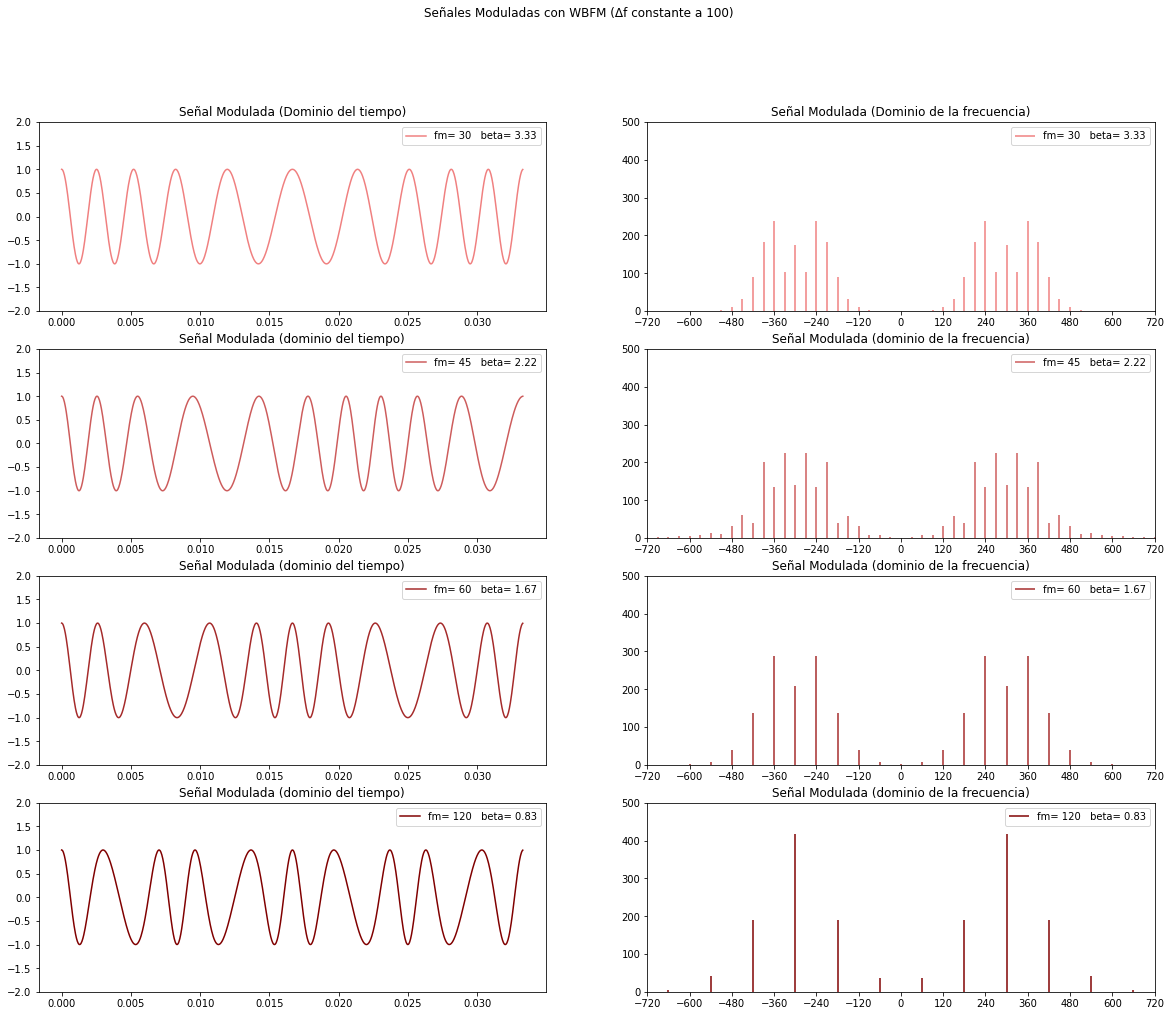

In [6]:
#Variar fm y deltaF constante

def WBFM(ac,fc,beta,fm):
    output = ac*cos(2*pi*fc*t + beta*sin(2*pi*fm*t))
    return output

Am=1.5
Ac=1
fc=300

fm=[30,45,60,120]

kf=200/3

s_wbfm = []
S_WBFM = [0,0,0,0]
S_WBFMtf = [0,0,0,0]
beta = []
for i in range(len(fm)):
    beta.append(kf*Am/fm[i])
    s_wbfm.append(WBFM(Ac,fc,beta[i],fm[i]))
    S_WBFMtf[i],S_WBFM[i] = plotfft(s_wbfm[i])


#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales Moduladas con WBFM (Δf constante a 100)')

#beta1
axs[0,0].plot(t,s_wbfm[0],color='lightcoral')
axs[0,0].set_title('Señal Modulada (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].legend(["fm= " + str(round(fm[0],2)) + "   beta= " + str(round(beta[0],2))])

axs[0,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[0,1].vlines(S_WBFMtf[0],0,np.abs(S_WBFM[0]),color='lightcoral')
axs[0,1].set_title('Señal Modulada (Dominio de la frecuencia)')
axs[0,1].legend(["fm= " + str(round(fm[0],2)) + "   beta= " + str(round(beta[0],2))])

#beta2
axs[1,0].plot(t,s_wbfm[1],color='indianred')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Modulada (dominio del tiempo)')
axs[1,0].legend(["fm= " + str(round(fm[1],0)) + "   beta= " + str(round(beta[1],2))])

axs[1,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[1,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[1,1].vlines(S_WBFMtf[1],0,np.abs(S_WBFM[1]),color='indianred')
axs[1,1].legend(["fm= " + str(round(fm[1],0)) + "   beta= " + str(round(beta[1],2))])

#beta3
axs[2,0].plot(t,s_wbfm[2],color='brown')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal Modulada (dominio del tiempo)')
axs[2,0].legend(["fm= " + str(round(fm[2],0)) + "   beta= " + str(round(beta[2],2))])

axs[2,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[2,1].vlines(S_WBFMtf[2],0,np.abs(S_WBFM[2]),color='brown')
axs[2,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[2,1].legend(["fm= " + str(round(fm[2],0)) + "   beta= " + str(round(beta[2],2))])

#beta4
axs[3,0].plot(t,s_wbfm[3],color='maroon')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal Modulada (dominio del tiempo)')
axs[3,0].legend(["fm= " + str(round(fm[3],0)) + "   beta= " + str(round(beta[3],2))])

axs[3,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[3,1].vlines(S_WBFMtf[3],0,np.abs(S_WBFM[3]),color='maroon')
axs[3,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[3,1].legend(["fm= " + str(round(fm[3],0)) + "   beta= " + str(round(beta[3],2))])

plt.show()

En el dominio del tiempo, se puede apreciar que la distancia máxima y mínima entre crestas (o entre valles o cruces por cero), es la misma para los cuatro valores. Esto se debe a que la desviación de frecuencia no cambia. Sin embargo, se puede apreciar que la figura de fm=120Hz, el tiempo en el que se repite las máximas frecuencias es mayor que el de 60Hz, que a su vez es mayor que la anterior y la anterior. Por lo tanto se puede concluir que un aumento en fm reduce el tiempo en el que se vuelve a encontrar una frecuencia máxima. Además, se puede apreciar fácilmente que el índice de modulación beta es inversamente proporcional a la frecuencia fm. 

También se observa que, en el dominio de la frecuencia, conforme aumenta beta (o disminuye fm), el contenido espectral de la señal aumenta. Esto se debe a que conforme aumenta beta, el efecto de los armónicos de la función de Bessel tienen es mayor. Cabe resaltar, que la curva de frecuencias siempre estará centrada en la frecuencia de la portadora. También se evidencia que el rango de valores de frecuencia que se presenta tampoco cambia, o sea que el contenido espectral siempre estará en el mismo rango (en este caso entre 0 y 600Hz). Por lo tanto, se concluye que fm no afecta en el ensanchamiento del rango de frecuencias, sólo en la variedad de frecuencias dentro de ese rango. 

#### 3- Despliegue, entre 3 y 5 gráficas de la señal modulada resultante en tiempo y la frecuencia, para diferentes valores de beta, variando únicamente 𝛥f y manteniendo 𝑓m constante. En las gráficas se debe visualizar el efecto de la variación en beta. Realice un análisis completo de los resultados obtenidos, para cada gráfica. 


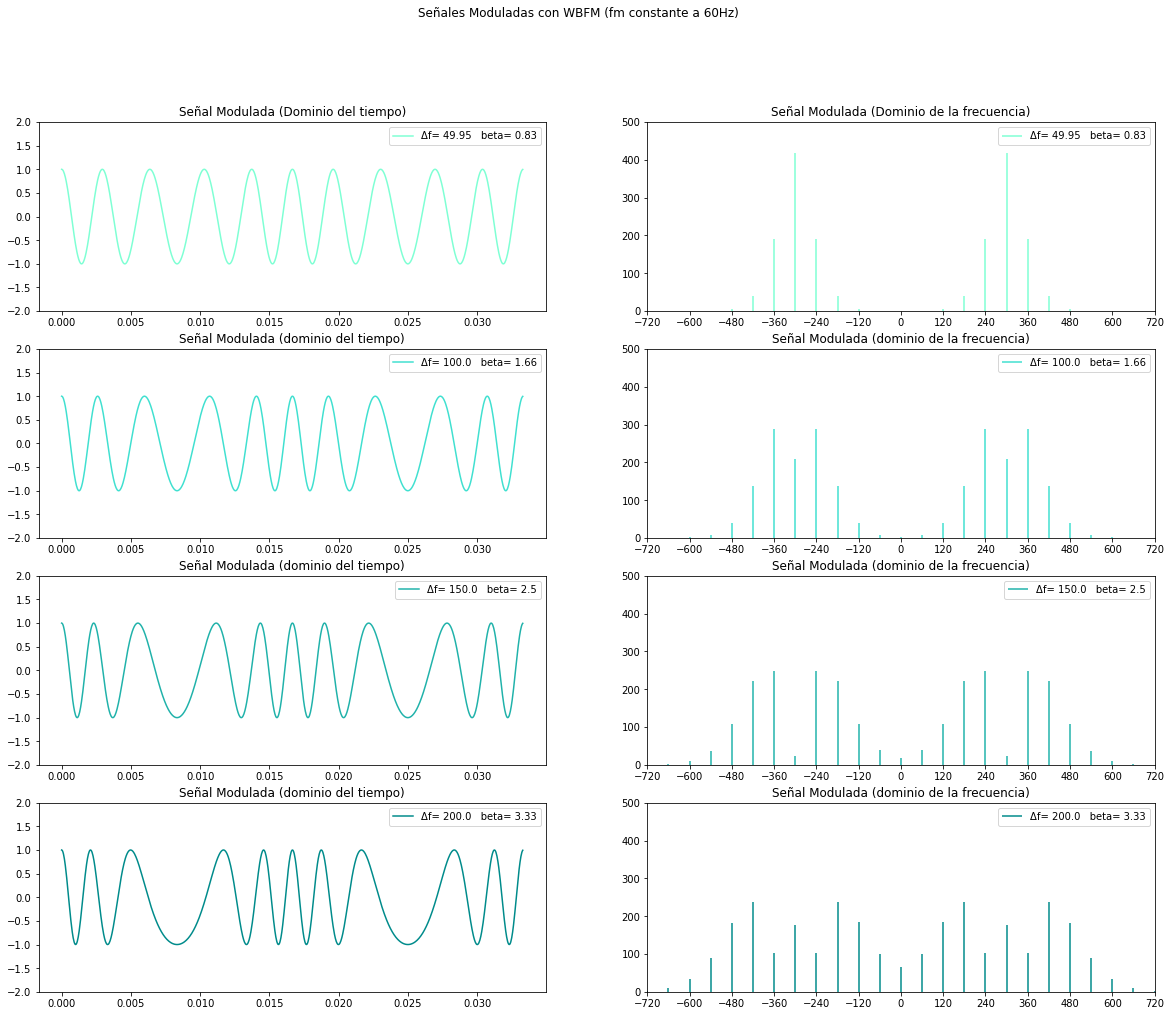

In [ ]:
#Variar DeltaF con fm constante

Am=1.5
Ac=1
fc=300
fm=60

kf=[33.3,66.6,100,133.3]
s_wbfm = []
S_WBFM = [0,0,0,0]
S_WBFMtf = [0,0,0,0]
beta = []
deltaF = []
for i in range(len(kf)):
    beta.append(kf[i]*Am/fm)
    deltaF.append(kf[i]*Am)
    s_wbfm.append(WBFM(Ac,fc,beta[i],fm))
    S_WBFMtf[i],S_WBFM[i] = plotfft(s_wbfm[i])


#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(4,2,figsize=(20,16))
fig3.suptitle('Señales Moduladas con WBFM (fm constante a 60Hz)')

#beta1
axs[0,0].plot(t,s_wbfm[0],color='aquamarine')
axs[0,0].set_title('Señal Modulada (Dominio del tiempo)')
axs[0,0].set(ylim=(-2,2))
axs[0,0].legend(["Δf= " + str(round(deltaF[0],2)) + "   beta= " + str(round(beta[0],2))])

axs[0,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[0,1].vlines(S_WBFMtf[0],0,np.abs(S_WBFM[0]),color='aquamarine')
axs[0,1].set_title('Señal Modulada (Dominio de la frecuencia)')
axs[0,1].legend(["Δf= " + str(round(deltaF[0],2)) + "   beta= " + str(round(beta[0],2))])

#beta2
axs[1,0].plot(t,s_wbfm[1],color='turquoise')
axs[1,0].set(ylim=(-2,2))
axs[1,0].set_title('Señal Modulada (dominio del tiempo)')
axs[1,0].legend(["Δf= " + str(round(deltaF[1],0)) + "   beta= " + str(round(beta[1],2))])

axs[1,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[1,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[1,1].vlines(S_WBFMtf[1],0,np.abs(S_WBFM[1]),color='turquoise')
axs[1,1].legend(["Δf= " + str(round(deltaF[1],0)) + "   beta= " + str(round(beta[1],2))])

#beta3
axs[2,0].plot(t,s_wbfm[2],color='lightseagreen')
axs[2,0].set(ylim=(-2,2))
axs[2,0].set_title('Señal Modulada (dominio del tiempo)')
axs[2,0].legend(["Δf= " + str(round(deltaF[2],0)) + "   beta= " + str(round(beta[2],2))])

axs[2,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[2,1].vlines(S_WBFMtf[2],0,np.abs(S_WBFM[2]),color='lightseagreen')
axs[2,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[2,1].legend(["Δf= " + str(round(deltaF[2],0)) + "   beta= " + str(round(beta[2],2))])

#beta4
axs[3,0].plot(t,s_wbfm[3],color='darkcyan')
axs[3,0].set(ylim=(-2,2))
axs[3,0].set_title('Señal Modulada (dominio del tiempo)')
axs[3,0].legend(["Δf= " + str(round(deltaF[3],0)) + "   beta= " + str(round(beta[3],2))])

axs[3,1].set(xlim=(-100,100),ylim=(0,500),xticks=(range(-720,840,120)))
axs[3,1].vlines(S_WBFMtf[3],0,np.abs(S_WBFM[3]),color='darkcyan')
axs[3,1].set_title('Señal Modulada (dominio de la frecuencia)')
axs[3,1].legend(["Δf= " + str(round(deltaF[3],0)) + "   beta= " + str(round(beta[3],2))])

plt.show()

En el dominio del tiempo, se puede apreciar que la distancia máxima y mínima entre crestas (o entre valles o cruces por cero), SI cambia bastante para los cuatro valores. Esto se debe a que la desviación de frecuencia cambia. Sin embargo, se puede apreciar que en todas las figuras, el tiempo de repetición entre frecuencia máxima y frecuencia máxima, es el mismo (en este caso ocurren en 0.008s y 0.025s para las 4 figuras). Por lo tanto se puede concluir que un aumento en 𝛥f no reduce el tiempo en el que se vuelve a encontrar una frecuencia máxima, pero sí el valor de esa frecuencia máxima. Además, se puede apreciar fácilmente que el índice de modulación beta es directamente proporcional a la frecuencia 𝛥f. 

También se observa que, en el dominio de la frecuencia, conforme aumenta beta (y aumenta 𝛥f), el rango de frecuencias sí aumenta, pues para el beta máximo se abarca un rango mayor (entre 0 y 700Hz aprox) que para el beta mínimo (entre 150Hz y 400Hz aprox). Pero sí se nota claramente que las distancias entre frecuencias son las mísmas siempre de 60Hz entre impulsos, por lo tanto el contenido espectral de la señal no aumenta como sí lo hacía para cambios en fm. 

#### 4- Escoja un valor de beta pequeño, como los usados en NBFM, grafique las curvas de frecuencia y verifique que se obtengan los resultados esperados, y realice un análisis completo de los resultados obtenidos. 


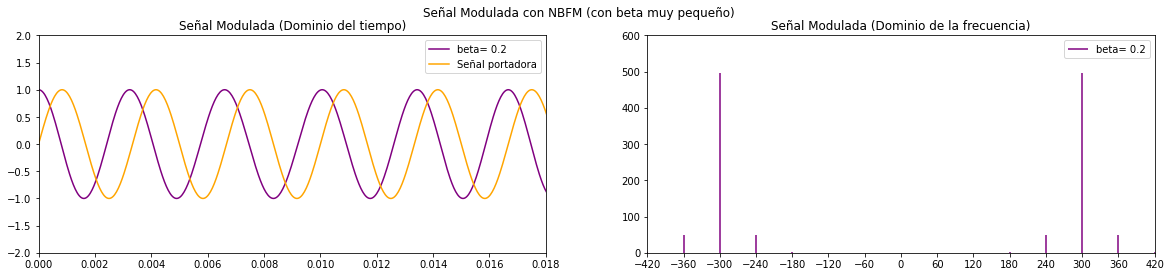

deltaF: 12.0Hz


In [15]:
#NBFM
Am=1.5
Ac=1
fc=300
fm=60

kf = 8
deltaF=kf*1.5

beta = kf*Am/fm

nbfm_4 = WBFM(Ac,fc,beta,fm)
NBFM_4tf,NBFM_4 = plotfft(nbfm_4)

#Plot de las señales desmodulada antes y despues del filtrado
fig3, axs = plt.subplots(1,2,figsize=(20,4))
fig3.suptitle('Señal Modulada con NBFM (con beta muy pequeño)')

#beta1
axs[0].plot(t,nbfm_4,color='purple')
axs[0].plot(t,c,color='orange')
axs[0].set_title('Señal Modulada (Dominio del tiempo)')
axs[0].set(ylim=(-2,2),xlim=(0,0.018))
axs[0].legend(["beta= " + str(beta),"Señal portadora"])

axs[1].set(xlim=(-100,100),ylim=(0,600),xticks=(range(-420,480,60)))
axs[1].vlines(NBFM_4tf,0,np.abs(NBFM_4),color='purple')
axs[1].set_title('Señal Modulada (Dominio de la frecuencia)')
axs[1].legend(["beta= " + str(beta)])
plt.show()

print('deltaF: ' + str(round(deltaF,3)) + 'Hz')

Al reducir el beta a un valor muy pequeño (<0.3), se observa que las componentes de armónicos de mayor orden de la función de Bessel prácticamente desaparecen y solo queda el armónico 0 (que equivale a uno), y el armónico 1 (que equivale a beta/2). Por esta razón es que se puede aproximar este caso de forma similar a una modulación AM DSBLC. Otro aspecto por analizar es que la señal modulada es prácticamente igual a una senoidal, pero no lo es: lo que ocurre es que la desviación de frecuencia es muy baja (apenas ±12Hz comparado con la frecuencia base de la portadora 300Hz), como producto del ajuste a un beta pequeño. Este resultado es esperado pues una señal AM-DSBLC tiene una componente de frecuencia en la frecuencia portadora y otras dos en ±fm, que es justo lo que ocurre aquí y se puede apreciar en el espectro de frecuencia. Una diferencia apreciable en el tiempo es que la señal portadora es un seno y que la señal modulada es más similar a un coseno

#### 5- Diseñe una rutina en la que obtenga las curvas de la función de Bessel. 

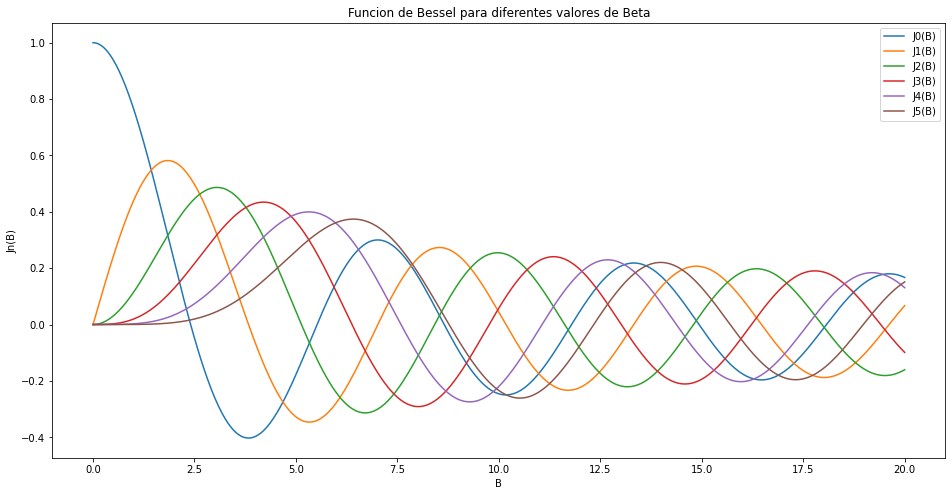

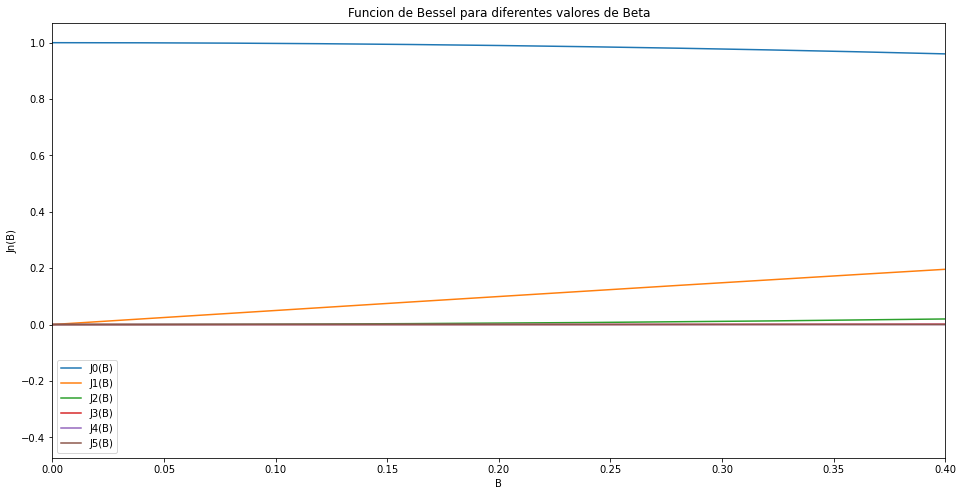

In [17]:
#Gaficador de curvas de Bessel
armonicos = linspace(0,5,6,dtype = int)
betas = linspace(0,20,500)
def j(n,b):
    res=0
    for m in range(80):
        den=factorial(m)*factorial(n+m)
        temp=(-1)**m*(b/2)**(n+2*m)/den
        res = res + temp
    return res
plt.figure(figsize=(16,8))
plt.title("Funcion de Bessel para diferentes valores de Beta")
plt.xlabel("B")
plt.ylabel("Jn(B)")
for n in armonicos:
    plt.plot(betas,j(n,betas))
plt.gca().legend(("J0(B)","J1(B)","J2(B)","J3(B)","J4(B)","J5(B)"))
plt.show()

plt.figure(figsize=(16,8))
plt.title("Funcion de Bessel para diferentes valores de Beta")
plt.xlabel("B")
plt.ylabel("Jn(B)")
for n in armonicos:
    plt.plot(betas,j(n,betas))
plt.xlim((0,0.4))
plt.gca().legend(("J0(B)","J1(B)","J2(B)","J3(B)","J4(B)","J5(B)"))
plt.show()

En la grafica se muestra la grafica de la funcion de Bessel para diferentes armonicos conforme el valor de beta(B) aumenta. Se aprecia como conforme cambia se avanza de armonico el valor de la funcion disminuye y por tanto el aporte de la funcion de Bessel. En la segunda gráfica también se puede apreciar que para valores de beta pequeños, el armónico 0 es 1, el armónico 1 es beta/2 (lineal) y los demás son aproximadamente cero.